$$ 
\begin{aligned}
&\frac{1}{r^2} \frac{d}{dr} r^2 \frac{d}{dr} f(r) \\
= &\frac{1}{r^2} \frac{d}{dr} r^2 \frac{df}{dr} \\
= &\frac{1}{r^2} \left( 2 r  \frac{df}{dr} +    r^2 \frac{d^2f}{dr^2}    \right) \\
= &\frac{2}{r}  \frac{df}{dr} + \frac{d^2f}{dr^2}
\end{aligned}
$$
$$
\begin{aligned}
&\frac{1}{r} \frac{d^2}{dr^2} r f(r) \\
= &\frac{1}{r} \frac{d}{dr} \left( f +  r \frac{df}{dr}    \right) \\
= &\frac{1}{r} \left( 2 \frac{df}{dr} +  r \frac{d^2f}{dr^2}   \right) \\
= &\frac{2}{r} \frac{df}{dr} + \frac{d^2f}{dr^2}
\end{aligned}
$$

$$
-\frac{1}{2} \frac{1}{r} \frac{d^2}{dr^2} r \psi(r) + \frac{1}{2 r^2} l (l+1) \psi(r) - \frac{Z}{r} \psi(r) = E \psi(r)
$$
$$
 \phi(r) = r \psi(r)
 $$
 $$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) + \frac{1}{2 r^2} l (l+1) \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
-\frac{1}{2} \frac{d^2}{dr^2} \phi(r) - \frac{Z}{r} \phi(r) = E \phi(r)
$$
$$
 r \in [0,\infty]
$$
$$
  \psi_{0} (r) = \exp(-Z r)
  $$
$$
 \psi(r) = 10^{-10} \implies r > \log(10^{-10}) / Z \approx 2.3 \times 10 / Z 
 $$

In [1]:
# setting up everything we need for the matrices
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import roots_legendre, eval_legendre
import math

Z = 1
L = math.log(10) * 10 / Z

n = 50
epsilon = 1e-6
roots, weights = roots_legendre(n)
P = np.array([eval_legendre(i, roots) for i in range(n+1)])
dP = np.zeros((n+1, n))
dP[1] = np.ones(n)
for i in range(2,n+1):
    dP[i] = (2*i-1) * P[i-1] + dP[i-2]

In [2]:
overlap_matrix = np.zeros((n,n))
for l in range (n):
    for m in range (n):
        approx_overlap = np.dot(P[l]*P[m], weights)
        if abs(approx_overlap) < epsilon:
            approx_overlap = 0
        overlap_matrix[l, m] = approx_overlap
print(overlap_matrix)


[[2.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.66666667 0.         ... 0.         0.         0.        ]
 [0.         0.         0.4        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02105263 0.         0.        ]
 [0.         0.         0.         ... 0.         0.02061856 0.        ]
 [0.         0.         0.         ... 0.         0.         0.02020202]]


In [3]:
pe_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx_pe = np.dot(P[l] * P[m] / (roots + 1), weights)
        if abs(approx_pe) < epsilon:
            approx_pe = 0
        pe_matrix[l, m] = approx_pe
print(pe_matrix)

[[ 8.99841068 -6.99841068  5.99841068 ... -0.12248299  0.08081633
  -0.04      ]
 [-6.99841068  6.99841068 -5.99841068 ...  0.12248299 -0.08081633
   0.04      ]
 [ 5.99841068 -5.99841068  5.99841068 ... -0.12248299  0.08081633
  -0.04      ]
 ...
 [-0.12248299  0.12248299 -0.12248299 ...  0.12248299 -0.08081633
   0.04      ]
 [ 0.08081633 -0.08081633  0.08081633 ... -0.08081633  0.08081633
  -0.04      ]
 [-0.04        0.04       -0.04       ...  0.04       -0.04
   0.04      ]]


In [4]:
ke_matrix = np.zeros((n, n))
for l in range (n):
    for m in range (n):
        approx_ke = np.dot(dP[l] * dP[m], weights)
        if abs(approx_ke) < epsilon:
            approx_ke = 0
        ke_matrix[l, m] = approx_ke
print(ke_matrix)

[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 ... 2.000e+00 0.000e+00 2.000e+00]
 [0.000e+00 0.000e+00 6.000e+00 ... 0.000e+00 6.000e+00 0.000e+00]
 ...
 [0.000e+00 2.000e+00 0.000e+00 ... 2.256e+03 0.000e+00 2.256e+03]
 [0.000e+00 0.000e+00 6.000e+00 ... 0.000e+00 2.352e+03 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 ... 2.256e+03 0.000e+00 2.450e+03]]


In [5]:
#obtaining coefficients
phi = lambda r: r * (math.e)**(-Z * r)
c = np.zeros(n)
for l in range(n):
    c[l] = ((2*l+1)/2) * np.dot(phi(L * 0.5 * (roots + 1)) * P[l], weights)
print(c)
fit = lambda x : np.dot(eval_legendre(range(n), 2 * x/L -1), c)
fit(6),phi(6)

[ 4.34294481e-02 -1.07654941e-01  1.18724566e-01 -7.83959027e-02
  1.40633078e-02  4.26417611e-02 -7.35007348e-02  7.76013945e-02
 -6.45539199e-02  4.55903067e-02 -2.83051658e-02  1.57664128e-02
 -7.98647935e-03  3.71540711e-03 -1.59949154e-03  6.41112296e-04
 -2.40471634e-04  8.47696630e-05 -2.81890099e-05  8.87152698e-06
 -2.65003480e-06  7.53290279e-07 -2.04240932e-07  5.29310855e-08
 -1.31372245e-08  3.12815551e-09 -7.15764019e-10  1.57613336e-10
 -3.34441802e-11  6.84378063e-12 -1.34891477e-12  2.53616855e-13
 -4.35231576e-14  5.66588983e-15 -2.98743443e-16  8.55171753e-16
 -2.22500604e-15  3.38975605e-15 -3.92760978e-15  3.64052199e-15
 -2.66362646e-15  1.01747111e-15  1.03481114e-15 -2.96192342e-15
  4.48003041e-15 -5.10866900e-15  4.67789309e-15 -3.17399505e-15
  9.32396113e-16  1.51111486e-15]


(0.014872513059998168, 0.014872513059998156)

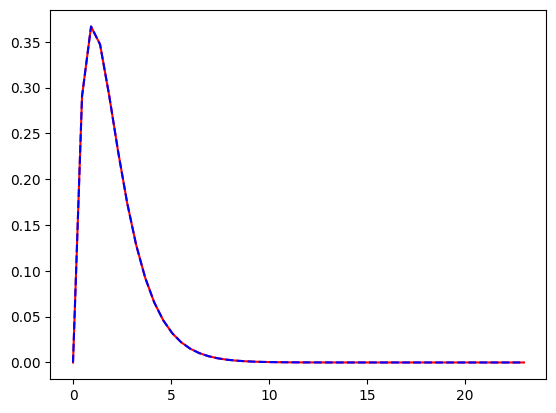

In [6]:
# phi(X) plotted with fit, showing very small error
X = np.linspace(start=0,stop=L,num=51)
F = [fit(x) for x in X]
plt.plot(X,F,"r",X,phi(X),"b--")

In [7]:
# numerical overlap computation
overlap_estimate = np.dot(c, np.dot(overlap_matrix, c)) * L * 0.5
ke_integral = np.dot(c, np.dot(ke_matrix, c)) / L
pe_integral = np.dot(c, np.dot(pe_matrix, c)) * -Z
ke_approx = ke_integral/overlap_estimate
pe_approx = pe_integral/overlap_estimate
energy_approx = ke_approx + pe_approx
print(overlap_estimate)
print(ke_approx, pe_approx, energy_approx)

0.24999999999999867
0.49999999999997297 -1.000000000000051 -0.5000000000000782
